Importing Libraries

In [54]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xlrd
import calendar
from scipy.stats import ttest_ind
from datetime import datetime, timedelta
from sklearn.linear_model import LinearRegression

Loading The Datasets

In [ ]:
# Load the datasets
cab_data = pd.read_csv('/content/Cab_Data.csv')
customer_data = pd.read_csv('/content/Customer_ID.csv')
transaction_data = pd.read_csv('/content/Transaction_ID.csv')
city_data = pd.read_csv('/content/City.csv')

Exploring The Data

In [ ]:
# Display the first few rows of each dataset to understand their structure and contents
print("Cab Data:")
print(cab_data.head())

Cab Data:
   Transaction ID  Date of Travel   Company        City  KM Travelled  \
0        10000011           42377  Pink Cab  ATLANTA GA         30.45   
1        10000012           42375  Pink Cab  ATLANTA GA         28.62   
2        10000013           42371  Pink Cab  ATLANTA GA          9.04   
3        10000014           42376  Pink Cab  ATLANTA GA         33.17   
4        10000015           42372  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip  
0         370.95       313.635  
1         358.52       334.854  
2         125.20        97.632  
3         377.40       351.602  
4         114.62        97.776  


In [ ]:
print("Customer Data:")
print(customer_data.head())

Customer Data:
   Customer ID Gender  Age  Income (USD/Month)
0        29290   Male   28               10813
1        27703   Male   27                9237
2        28712   Male   53               11242
3        28020   Male   23               23327
4        27182   Male   33                8536


In [ ]:
print("Transaction Data:")
print(transaction_data.head())

Transaction Data:
   Transaction ID  Customer ID Payment_Mode
0        10000011        29290         Card
1        10000012        27703         Card
2        10000013        28712         Cash
3        10000014        28020         Cash
4        10000015        27182         Card


In [ ]:
print("City Data:")
print(city_data.head())

City Data:
             City   Population      Users
0     NEW YORK NY   8,405,837    302,149 
1      CHICAGO IL   1,955,130    164,468 
2  LOS ANGELES CA   1,595,037    144,132 
3        MIAMI FL   1,339,155     17,675 
4  SILICON VALLEY   1,177,609     27,247 


Creating Master Data

In [ ]:
# Join Cab Data with City Data on the 'City' column
master_data = pd.merge(cab_data, city_data, on='City')

In [ ]:
# Display column names in the master dataset
print("Columns in Master Data:")
print(master_data.columns)

# Display column names in the customer_data dataframe
print("\nColumns in Customer Data:")
print(customer_data.columns)

Columns in Master Data:
Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip', 'Population', 'Users'],
      dtype='object')

Columns in Customer Data:
Index(['Customer ID', 'Gender', 'Age', 'Income (USD/Month)'], dtype='object')


In [ ]:
# Display column names in the transaction_data dataframe
print("Columns in Transaction Data:")
print(transaction_data.columns)

Columns in Transaction Data:
Index(['Transaction ID', 'Customer ID', 'Payment_Mode'], dtype='object')


In [ ]:
# Display column names in the master_data dataframe
print("Columns in Master Data:")
print(master_data.columns)

Columns in Master Data:
Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip', 'Population', 'Users'],
      dtype='object')


Creating Master Data

In [ ]:
# Merge Customer Data with Transaction Data
master_data = pd.merge(master_data, transaction_data, on='Transaction ID')

# Merge Customer Data with Master Data
master_data = pd.merge(master_data, customer_data, on='Customer ID')

In [ ]:
# Display column names in the master_data dataframe
print("Columns in Master Data:")
print(master_data.columns)

Columns in Master Data:
Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip', 'Population', 'Users', 'Customer ID',
       'Payment_Mode', 'Gender', 'Age', 'Income (USD/Month)'],
      dtype='object')


Identifying and Removing Duplicates

In [ ]:
# Drop duplicate records
master_data.drop_duplicates(inplace=True)

In [ ]:
# Performing Data Quality Checks
print("Missing Values:\n", master_data.isnull().sum())

Missing Values:
 Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Population            0
Users                 0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64


Exploring Master Data

In [ ]:
# Display the first few rows of the master dataset
print("Master Data:")
print(master_data.head())

Master Data:
   Transaction ID  Date of Travel     Company        City  KM Travelled  \
0        10000011           42377    Pink Cab  ATLANTA GA         30.45   
1        10351127           43302  Yellow Cab  ATLANTA GA         26.19   
2        10412921           43427  Yellow Cab  ATLANTA GA         42.55   
3        10000012           42375    Pink Cab  ATLANTA GA         28.62   
4        10320494           43211  Yellow Cab  ATLANTA GA         36.38   

   Price Charged  Cost of Trip Population     Users  Customer ID Payment_Mode  \
0         370.95      313.6350   814,885    24,701         29290         Card   
1         598.70      317.4228   814,885    24,701         29290         Cash   
2         792.05      597.4020   814,885    24,701         29290         Card   
3         358.52      334.8540   814,885    24,701         27703         Card   
4         721.10      467.1192   814,885    24,701         27703         Card   

  Gender  Age  Income (USD/Month)  
0   Male   28

In [62]:
# Calculate number of rows in master data
total_rows = master_data.shape[0]
print("Total number of rows in all combined datasets:", total_rows)

# Total number of observations (number of rows)
total_observations = len(master_data)
print("Total number of observations:", total_observations)

# Total number of features (number of columns)
total_features = master_data.shape[1]
print("Total number of features:", total_features)

# Calculate the size of the data in bytes
size_bytes = master_data.memory_usage().sum()
# Convert bytes to gigabytes
size_gb = size_bytes / (1024**3)
# Print the size of the data
print("Size of the data:", f"{size_gb:.2f} GB")

Total number of rows in all combined datasets: 359392
Total number of observations: 359392
Total number of features: 18
Size of the data: 0.05 GB


Convert 'Date of Travel' column to datetime format

In [ ]:
# Converting Excel date format to datetime
def excel_to_datetime(excel_date):
    return datetime(1899, 12, 30) + timedelta(days=excel_date)

# Convert 'Date of Travel' column to datetime format
cab_data['Date of Travel'] = cab_data['Date of Travel'].apply(excel_to_datetime)

In [ ]:
# Display the updated dataset
print(cab_data.head())

   Transaction ID Date of Travel   Company        City  KM Travelled  \
0        10000011     2016-01-08  Pink Cab  ATLANTA GA         30.45   
1        10000012     2016-01-06  Pink Cab  ATLANTA GA         28.62   
2        10000013     2016-01-02  Pink Cab  ATLANTA GA          9.04   
3        10000014     2016-01-07  Pink Cab  ATLANTA GA         33.17   
4        10000015     2016-01-03  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip  
0         370.95       313.635  
1         358.52       334.854  
2         125.20        97.632  
3         377.40       351.602  
4         114.62        97.776  


Determining Total Cab Rides per month

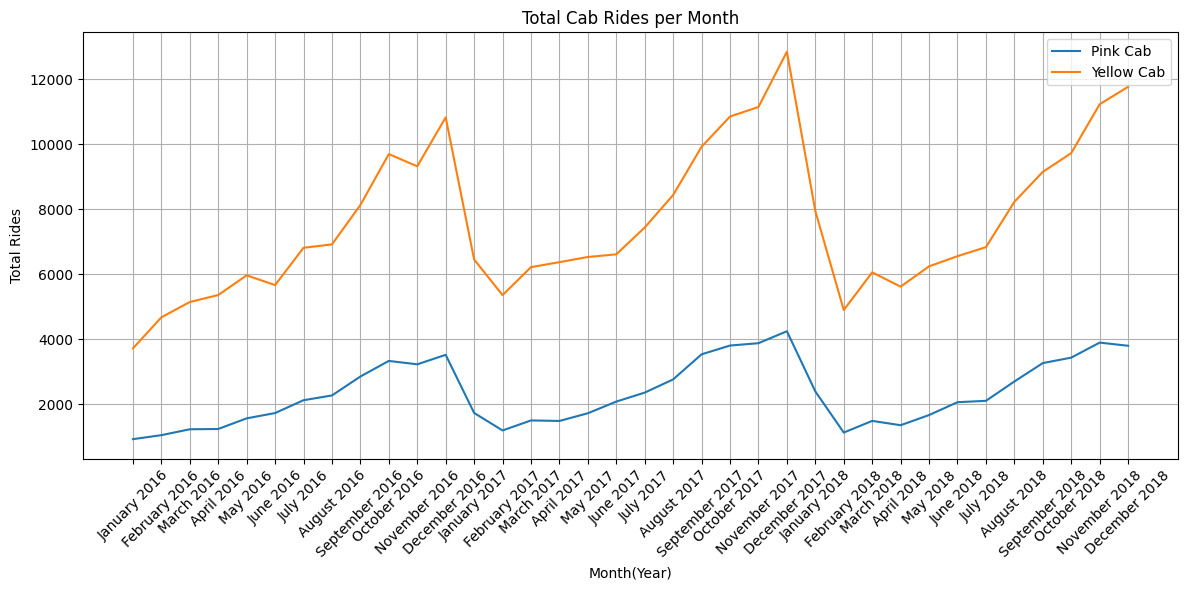

In [ ]:
# Extract month and year from 'Date of Travel'
cab_data['Month'] = cab_data['Date of Travel'].dt.month
cab_data['Year'] = cab_data['Date of Travel'].dt.year

# Group data by month, year, and company and count the number of cab rides
monthly_rides_company = cab_data.groupby(['Year', 'Month', 'Company']).size().reset_index(name='Total Rides')

# Map month numbers to month names
monthly_rides_company['Month'] = monthly_rides_company['Month'].apply(lambda x: calendar.month_name[x])

# Combine 'Month' and 'Year' into a single column for easier plotting
monthly_rides_company['Month_Year'] = monthly_rides_company['Month'] + ' ' + monthly_rides_company['Year'].astype(str)


# Filter data for Pink Cab
monthly_rides_pink_cab = monthly_rides_company[monthly_rides_company['Company'] == 'Pink Cab']

# Filter data for Yellow Cab
monthly_rides_yellow_cab = monthly_rides_company[monthly_rides_company['Company'] == 'Yellow Cab']

# Visualize the trend of cab rides per month for both Pink Cab and Yellow Cab
plt.figure(figsize=(12, 6))

# Plot for Pink Cab
plt.plot(monthly_rides_pink_cab['Month_Year'], monthly_rides_pink_cab['Total Rides'], linestyle='-', label='Pink Cab')

# Plot for Yellow Cab
plt.plot(monthly_rides_yellow_cab['Month_Year'], monthly_rides_yellow_cab['Total Rides'], linestyle='-', label='Yellow Cab')

plt.title('Total Cab Rides per Month')
plt.xlabel('Month(Year)')
plt.ylabel('Total Rides')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Calculating Average Profit Margins Over Time by Seasonal Period and Holiday

In [ ]:
# Function to convert Excel date format to datetime
def excel_to_datetime(excel_date):
    return datetime(1899, 12, 30) + timedelta(days=excel_date)

# Convert 'Date of Travel' column to datetime format
master_data['Date of Travel'] = master_data['Date of Travel'].apply(excel_to_datetime)

# Display the updated dataset
print(master_data.head())


   Transaction ID Date of Travel     Company        City  KM Travelled  \
0        10000011     2016-01-08    Pink Cab  ATLANTA GA         30.45   
1        10351127     2018-07-21  Yellow Cab  ATLANTA GA         26.19   
2        10412921     2018-11-23  Yellow Cab  ATLANTA GA         42.55   
3        10000012     2016-01-06    Pink Cab  ATLANTA GA         28.62   
4        10320494     2018-04-21  Yellow Cab  ATLANTA GA         36.38   

   Price Charged  Cost of Trip Population     Users  Customer ID Payment_Mode  \
0         370.95      313.6350   814,885    24,701         29290         Card   
1         598.70      317.4228   814,885    24,701         29290         Cash   
2         792.05      597.4020   814,885    24,701         29290         Card   
3         358.52      334.8540   814,885    24,701         27703         Card   
4         721.10      467.1192   814,885    24,701         27703         Card   

  Gender  Age  Income (USD/Month)  
0   Male   28               1081

In [40]:
# Calculate profit margin for each transaction
master_data['Profit Margin (%)'] = ((master_data['Price Charged'] - master_data['Cost of Trip']) / master_data['Price Charged']) * 100

# Calculate average profit margins for Pink Cab and Yellow Cab
avg_profit_margin_pink = master_data[master_data['Company'] == 'Pink Cab']['Profit Margin (%)'].mean()
avg_profit_margin_yellow = master_data[master_data['Company'] == 'Yellow Cab']['Profit Margin (%)'].mean()

# Print average profit margins
print("Average Profit Margin for Pink Cab: {:.2f}%".format(avg_profit_margin_pink))
print("Average Profit Margin for Yellow Cab: {:.2f}%".format(avg_profit_margin_yellow))

# Perform t-test to compare average profit margins
t_stat, p_value = ttest_ind(master_data[master_data['Company'] == 'Pink Cab']['Profit Margin (%)'],
                             master_data[master_data['Company'] == 'Yellow Cab']['Profit Margin (%)'],
                             equal_var=False)

print("\nT-Statistic:", t_stat)
print("P-Value:", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("\nReject the null hypothesis. There is a significant difference in profit margins between Pink Cab and Yellow Cab.")
else:
    print("\nAccept the null hypothesis. There is no significant difference in profit margins between Pink Cab and Yellow Cab.")


Average Profit Margin for Pink Cab: 17.38%
Average Profit Margin for Yellow Cab: 30.13%

T-Statistic: -199.14466870385883
P-Value: 0.0

Reject the null hypothesis. There is a significant difference in profit margins between Pink Cab and Yellow Cab.


In [41]:
# Define seasonal periods and holidays
seasonal_periods = [
    ('Spring', (pd.Timestamp('2016-03-20'), pd.Timestamp('2016-06-20')),
               (pd.Timestamp('2017-03-20'), pd.Timestamp('2017-06-20')),
               (pd.Timestamp('2018-03-20'), pd.Timestamp('2018-06-20'))),
    ('Summer', (pd.Timestamp('2016-06-21'), pd.Timestamp('2016-09-22')),
               (pd.Timestamp('2017-06-21'), pd.Timestamp('2017-09-22')),
               (pd.Timestamp('2018-06-21'), pd.Timestamp('2018-09-22'))),
    ('Fall', (pd.Timestamp('2016-09-23'), pd.Timestamp('2016-12-21')),
             (pd.Timestamp('2017-09-23'), pd.Timestamp('2017-12-21')),
             (pd.Timestamp('2018-09-23'), pd.Timestamp('2018-12-21'))),
    ('Winter', (pd.Timestamp('2016-12-22'), pd.Timestamp('2017-03-19')),
               (pd.Timestamp('2017-12-22'), pd.Timestamp('2018-03-19')),
               (pd.Timestamp('2018-12-22'), pd.Timestamp('2019-03-19'))),
    ('Thanksgiving', (pd.Timestamp('2016-11-01'), pd.Timestamp('2016-11-30')),
                     (pd.Timestamp('2017-11-01'), pd.Timestamp('2017-11-30')),
                     (pd.Timestamp('2018-11-01'), pd.Timestamp('2018-11-30'))),
    ('Christmas', (pd.Timestamp('2016-12-01'), pd.Timestamp('2016-12-31')),
                  (pd.Timestamp('2017-12-01'), pd.Timestamp('2017-12-31')),
                  (pd.Timestamp('2018-12-01'), pd.Timestamp('2018-12-31')))
]

# Create an empty list to store DataFrame
dfs = []

# Iterate over seasonal periods and holidays
for period, *date_ranges in seasonal_periods:
    for start_date, end_date in date_ranges:
        # Filter data for the current period
        period_data = master_data[(master_data['Date of Travel'] >= start_date) &
                                  (master_data['Date of Travel'] <= end_date)]

        # Calculate average profit margin for Pink Cab and Yellow Cab
        avg_profit_margin_pink = period_data.loc[period_data['Company'] == 'Pink Cab', 'Profit Margin (%)'].mean()
        avg_profit_margin_yellow = period_data.loc[period_data['Company'] == 'Yellow Cab', 'Profit Margin (%)'].mean()

        # Append results to list
        dfs.append(pd.DataFrame({
            'Period': [period],
            'Cab Company': ['Pink Cab'],
            'Average Profit Margin': [avg_profit_margin_pink]
        }))

        dfs.append(pd.DataFrame({
            'Period': [period],
            'Cab Company': ['Yellow Cab'],
            'Average Profit Margin': [avg_profit_margin_yellow]
        }))

# Concatenate DataFrames in the list
profitability_data = pd.concat(dfs, ignore_index=True)

# Display the first few rows of the profitability data
print(profitability_data.head())


   Period Cab Company  Average Profit Margin
0  Spring    Pink Cab              14.309679
1  Spring  Yellow Cab              35.130509
2  Spring    Pink Cab              13.914629
3  Spring  Yellow Cab              35.227831
4  Spring    Pink Cab              11.645587


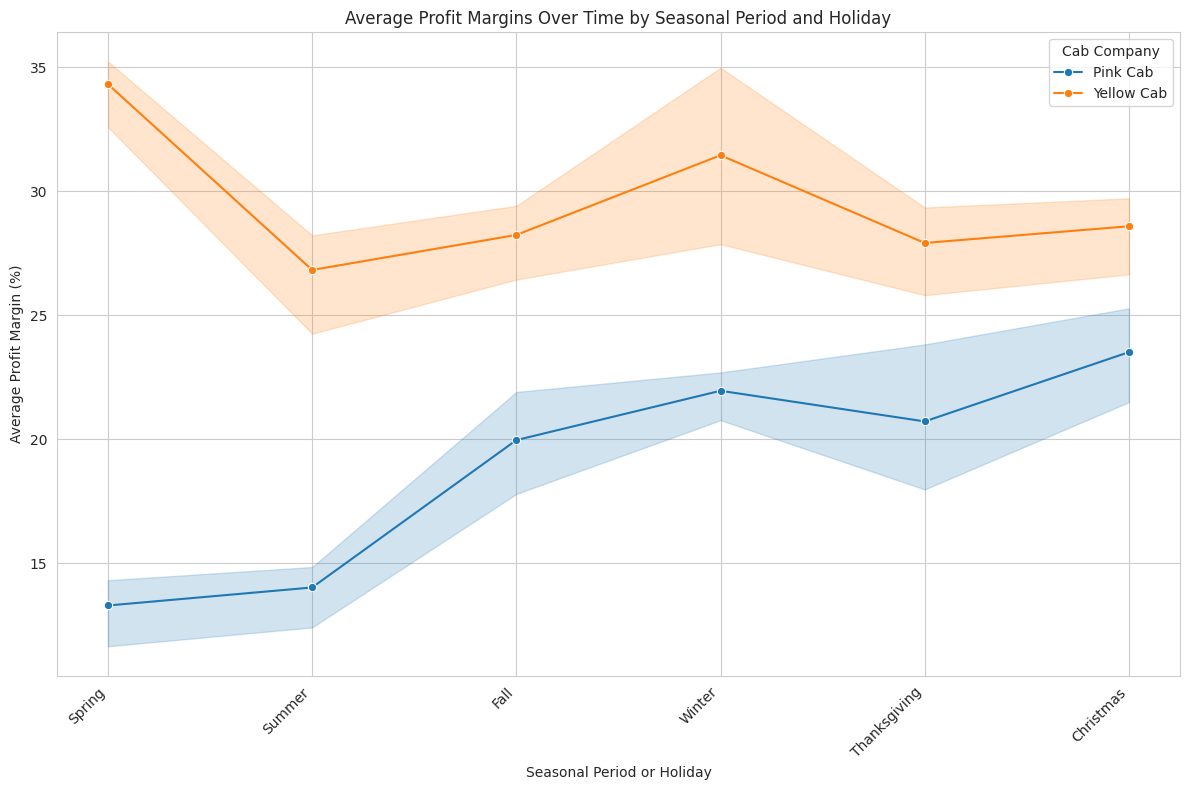

In [42]:
# Set the style of seaborn
sns.set_style("whitegrid")

# Plot line graph
plt.figure(figsize=(12, 8))
sns.lineplot(data=profitability_data, x='Period', y='Average Profit Margin', hue='Cab Company', marker='o')
plt.title('Average Profit Margins Over Time by Seasonal Period and Holiday')
plt.xlabel('Seasonal Period or Holiday')
plt.ylabel('Average Profit Margin (%)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Cab Company')
plt.tight_layout()
plt.show()


Calculating Customer Age Distribution by Cab Company

In [60]:
# Merge cab_data with customer_data on Transaction ID and Customer ID
merged_data = pd.merge(cab_data, customer_data, left_on='Transaction ID', right_on='Customer ID', how='left')


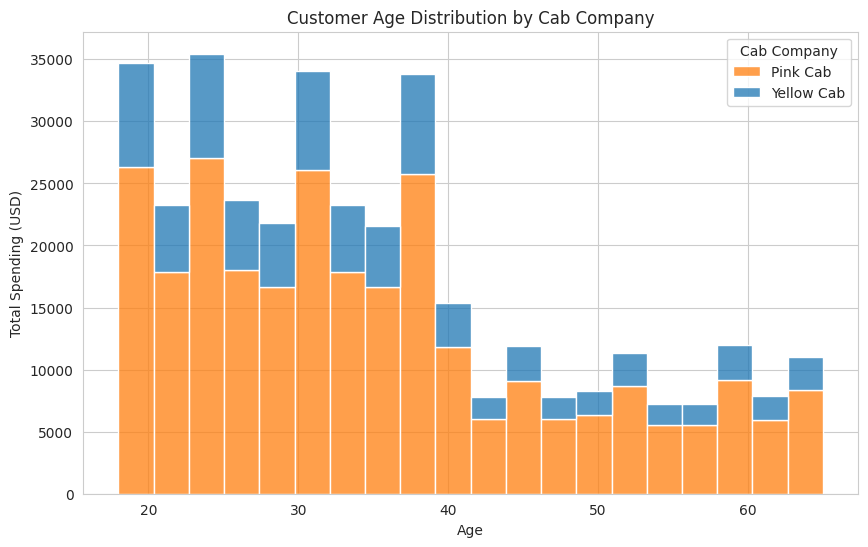

In [45]:
# Plot histograms of customer ages for Pink Cab and Yellow Cab using master data
plt.figure(figsize=(10, 6))
sns.histplot(data=master_data, x='Age', hue='Company', multiple='stack', bins=20)
plt.title('Customer Age Distribution by Cab Company')
plt.xlabel('Age')
plt.ylabel('Total Spending (USD)')
plt.legend(title='Cab Company', labels=['Pink Cab', 'Yellow Cab'])
plt.show()


Calculating Profitability Across Age Groups

In [46]:
# Define age group boundaries
age_bins = [18, 25, 35, 45, 55, 65, float('inf')]

# Define age group labels
age_labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '65+']

# Categorize customers into age groups
master_data['Age Group'] = pd.cut(master_data['Age'], bins=age_bins, labels=age_labels, right=False)

# Display the first few rows of the updated DataFrame with age groups
print("First few rows of Master Data with Age Groups:")
print(master_data.head())

# Calculate total profit made by Pink Cab and Yellow Cab for each age group
profit_by_age_group = master_data.groupby(['Age Group', 'Company'])['Price Charged'].sum().reset_index()

# Display the calculated profits
print("Total Profit by Age Group and Cab Company:")
print(profit_by_age_group)


First few rows of Master Data with Age Groups:
   Transaction ID Date of Travel     Company        City  KM Travelled  \
0        10000011     2016-01-08    Pink Cab  ATLANTA GA         30.45   
1        10351127     2018-07-21  Yellow Cab  ATLANTA GA         26.19   
2        10412921     2018-11-23  Yellow Cab  ATLANTA GA         42.55   
3        10000012     2016-01-06    Pink Cab  ATLANTA GA         28.62   
4        10320494     2018-04-21  Yellow Cab  ATLANTA GA         36.38   

   Price Charged  Cost of Trip Population     Users  Customer ID Payment_Mode  \
0         370.95      313.6350   814,885    24,701         29290         Card   
1         598.70      317.4228   814,885    24,701         29290         Cash   
2         792.05      597.4020   814,885    24,701         29290         Card   
3         358.52      334.8540   814,885    24,701         27703         Card   
4         721.10      467.1192   814,885    24,701         27703         Card   

  Gender  Age  Income

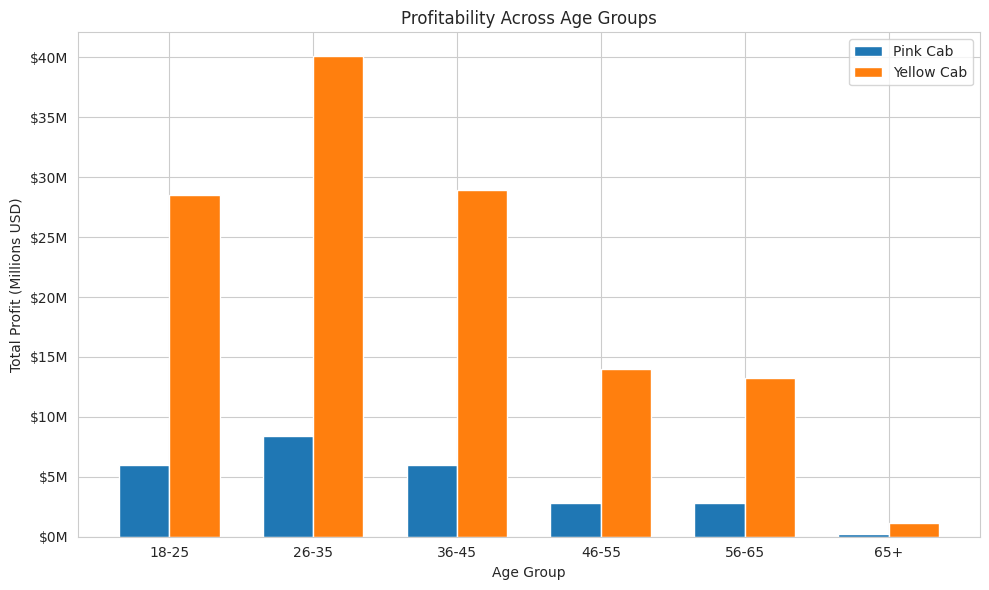

In [47]:

# Get unique age groups
age_groups = profit_by_age_group['Age Group'].unique()

# Set the width of the bars
bar_width = 0.35

# Set the positions for the bars
positions = np.arange(len(age_groups))

# Convert total profit to millions
profit_by_age_group['Total Profit (Millions)'] = profit_by_age_group['Price Charged'] / 1_000_000

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(positions, profit_by_age_group[profit_by_age_group['Company'] == 'Pink Cab']['Total Profit (Millions)'],
        bar_width, label='Pink Cab')
plt.bar(positions + bar_width, profit_by_age_group[profit_by_age_group['Company'] == 'Yellow Cab']['Total Profit (Millions)'],
        bar_width, label='Yellow Cab')

# Add labels and title
plt.xlabel('Age Group')
plt.ylabel('Total Profit (Millions USD)')
plt.title('Profitability Across Age Groups')
plt.xticks(positions + bar_width / 2, age_groups)
plt.legend()

# Format y-axis labels in millions
plt.gca().yaxis.set_major_formatter('${:,.0f}M'.format)

# Show plot
plt.tight_layout()
plt.show()


Profitability by City and Cab Company

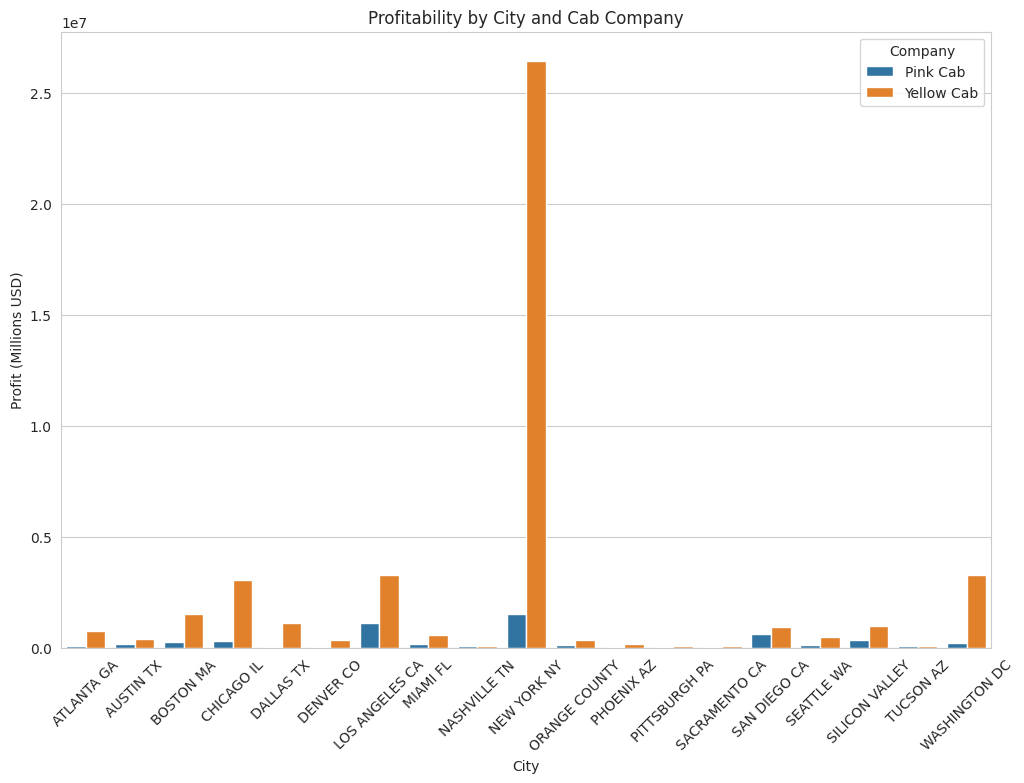

In [49]:
# Calculate profitability for each transaction
master_data['Profit'] = master_data['Price Charged'] - master_data['Cost of Trip']

# Aggregate profits by city and cab company
profit_by_city_company = master_data.groupby(['City', 'Company'])['Profit'].sum().reset_index()

# Create a bar chart to visualize profitability by city and cab company
plt.figure(figsize=(12, 8))
sns.barplot(x='City', y='Profit', hue='Company', data=profit_by_city_company)
plt.xlabel('City')
plt.ylabel('Profit (Millions USD)')
plt.title('Profitability by City and Cab Company')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()

Forecasting Profit Growth Trends

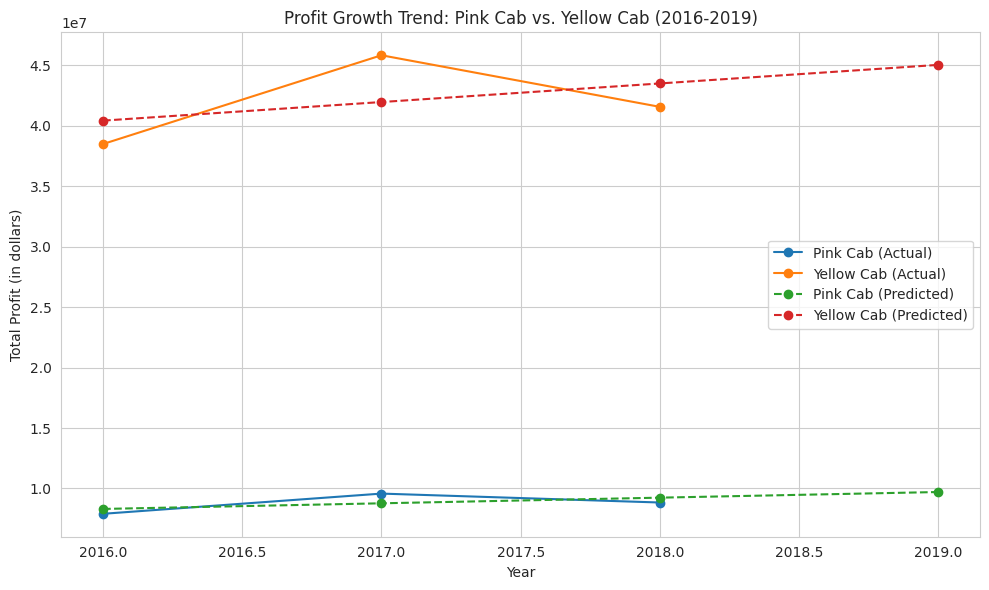

In [55]:
# Convert 'Date of Travel' column to datetime format
master_data['Date of Travel'] = pd.to_datetime(master_data['Date of Travel'])

# Extract the year from the 'Date of Travel' column
master_data['Transaction Year'] = master_data['Date of Travel'].dt.year

# Group the data by 'Transaction Year' and 'Company' and calculate total profit for each group
profit_by_year_company = master_data.groupby(['Transaction Year', 'Company'])['Price Charged'].sum().reset_index()

# Filter data until 2019
profit_by_year_company = profit_by_year_company[profit_by_year_company['Transaction Year'] <= 2019]

# Pivot the data for better visualization
pivot_data = profit_by_year_company.pivot(index='Transaction Year', columns='Company', values='Price Charged')

# Prepare data for prediction
X_train = pivot_data.index.values.reshape(-1, 1)  # Years
y_pink = pivot_data['Pink Cab'].values.reshape(-1, 1)  # Pink Cab profits
y_yellow = pivot_data['Yellow Cab'].values.reshape(-1, 1)  # Yellow Cab profits

# Initialize linear regression models
model_pink = LinearRegression()
model_yellow = LinearRegression()

# Fit models
model_pink.fit(X_train, y_pink)
model_yellow.fit(X_train, y_yellow)

# Predict profits until 2019
X_pred = np.arange(2016, 2020).reshape(-1, 1)  # Years from 2016 to 2019
y_pred_pink = model_pink.predict(X_pred)
y_pred_yellow = model_yellow.predict(X_pred)

# Plot the line graph
plt.figure(figsize=(10, 6))

# Actual profits
plt.plot(pivot_data.index, pivot_data['Pink Cab'], marker='o', label='Pink Cab (Actual)')
plt.plot(pivot_data.index, pivot_data['Yellow Cab'], marker='o', label='Yellow Cab (Actual)')

# Predicted profits until 2019
plt.plot(X_pred, y_pred_pink, marker='o', linestyle='--', label='Pink Cab (Predicted)')
plt.plot(X_pred, y_pred_yellow, marker='o', linestyle='--', label='Yellow Cab (Predicted)')

# Add labels and title
plt.title('Profit Growth Trend: Pink Cab vs. Yellow Cab (2016-2019)')
plt.xlabel('Year')
plt.ylabel('Total Profit (in dollars)')
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


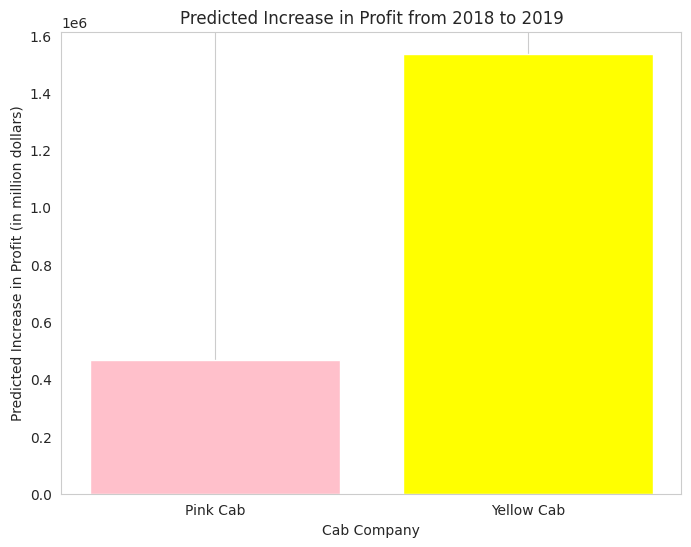

In [58]:
# Calculate the predicted increase from 2018 to 2019 for both cab companies
increase_pink = y_pred_pink[-1] - y_pred_pink[-2]
increase_yellow = y_pred_yellow[-1] - y_pred_yellow[-2]

# Plot the bar graph
plt.figure(figsize=(8, 6))
companies = ['Pink Cab', 'Yellow Cab']
increases = [increase_pink[0], increase_yellow[0]]

plt.bar(companies, increases, color=['pink', 'yellow'])
plt.xlabel('Cab Company')
plt.ylabel('Predicted Increase in Profit (in million dollars)')
plt.title('Predicted Increase in Profit from 2018 to 2019')
plt.grid(axis='y')

# Show the plot
plt.show()


We have evaluated both the cab companies on following points and found Yellow cab better than Pink cab:

Total Rides  : Yellow cab has higher number of rides per month, as compared to Pink Cab.

Age wise Reach : Yellow cab has customer in all age group and it’s been observed that it’s even popular in 60+ age group as equally as its in 18-25 age group, compared to Pink Cab.

Seasonal Profitability: Both companies experienced fluctuations throughout the year although Yellow Cab demonstrated higher profitability during peak seasons compared to Pink Cab.

City Profitability :Yellow Cab has more profitability across all cities, especially in New York, compared to Pink Cab.

Predicted Growth : Both companies will experience profit growth in 2019, with Yellow Cab experiencing more profit growth than Pink Cab.

Based on the above findings, we recommend Yellow Cab for Investing.